In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os, sys

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()


In [3]:
X, y = iris.data, iris.target

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [6]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
X[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [9]:
k = iris.data[:,2:] # petal length and width

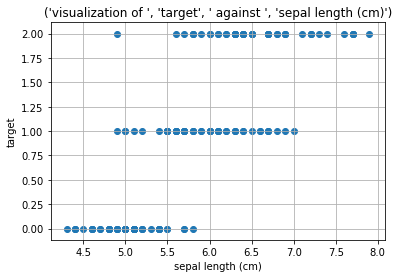

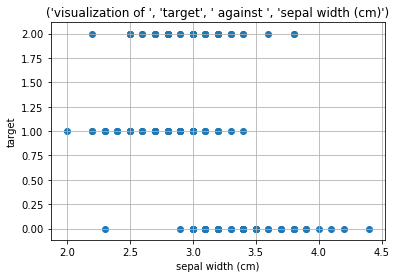

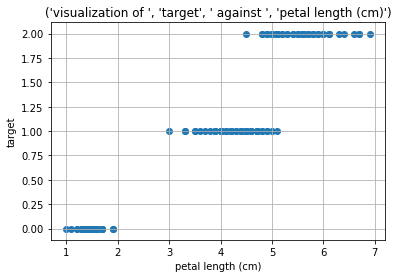

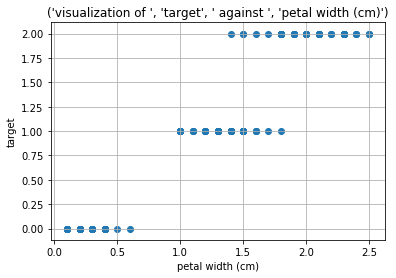

In [10]:
# visulizing each feature with the target class
import matplotlib.pyplot as plt

def visualize(a,b, labels,form = 'scatter'):
    x_label, y_label = labels
    if form == 'scatter':
        plt.scatter(a,b)
        plt.grid()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        concat = 'visualization of ',y_label, ' against ',x_label
        plt.title(concat)
        plt.show()
    elif form == 'plot':
        plt.plot(a,b)
        plt.grid()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        concat = 'visualization of ',y_label, ' against ',x_label
        plt.title(concat)
        plt.show()
    elif form == 'bar':
        plt.bar(a,b)
        plt.grid()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        concat = 'visualization of ',y_label, ' against ',x_label
        plt.title(concat)
        plt.show()
    return 

visualize(X[:,0], y,labels = ('sepal length (cm)', 'target'),form = 'scatter')
visualize(X[:,1], y, labels = ('sepal width (cm)', 'target'),form = 'scatter')
visualize(X[:,2], y, labels = ('petal length (cm)', 'target'),form = 'scatter')
visualize(X[:,3], y, labels = ('petal width (cm)', 'target'),form = 'scatter') 

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(k,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [16]:
tree_clf.score(k,y)

0.95999999999999996

# increasing the maximum depth to 4

In [17]:
tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(k,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
tree_clf.score(k,y)

0.98666666666666669

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file = 'iris_tree.png', feature_names = iris.feature_names[2:],
               class_names = iris.target_names,rounded = True, filled = True)

In [14]:
# one of the many qualities of decision trees is that they require very little data preparation. In
# particular, they don't require feature scaling or centering at all.

# Estimating class probabilities

In [19]:
tree_clf.predict_proba([[5,1.5]])

array([[ 0.,  0.,  1.]])

In [22]:
tree_clf.predict([[5,1.5]])

array([2])

In [23]:
# a node's samples attribute counts how many training instances it applies to.
# a node's value attribute tells you how many training instances of each class this node applies to.
# when we mean node, we mean the input value on which decision is to be made for proper classification


# the training algorithm computes the gini score G(i) of the ith node. 

def sum_p_i_k_square(i,k,n):
    # p(i,k) is the ratio of class k instances among the training instances in the ith node.
    # n is the number of training examples
    return i/k

def Gini_impurity(i,k,n):
    "where n is the number of training examples"
    return 1 - sum_p_i_k_square(i,k,n)

# model interpretation: White Box versus Black box

# The cart training algorithm

# Cost function minimization of the cart training algorithm

In [24]:
def no_of_instances(default= 'left'):
    "measure the impurity of the left/night"
    if default == 'left':
        val = None
    else:
        val = None
    return val

def impurity_measure(default = 'left'):
    "measures the no of instances in the left/right subset"
    if default == 'left':
        val =None
    else:
        val = None
    return val

def cost_function_cart(k,tk):
    "m is the number of instances"
    "single feature k"
    "threshold tk"
    compute_1 = no_of_instances(default = 'left')*impurity_measure(default = 'left') 
    compute_2 = no_of_instances(default = 'right')*impurity_measure(default = 'right')
    return (compute_1 - compute_2)/m